In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('data/playoff_per_game_2013-22.csv')
pred_data = pd.read_csv('data/team_per_game_2023.csv')
data.head()

,Unnamed: 0,Team,Year,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Attend.,Attend./G,Playoff_W,Payroll,Adjusted Payroll
0,0,Minnesota Timberwolves,2022,41.6,91.0,0.457,14.8,41.3,0.358,26.8,...,0.198,0.535,14.2,74.9,0.227,657148.0,16028.0,2.0,137432702,150698.709387
1,1,Memphis Grizzlies,2022,43.5,94.4,0.461,11.5,32.7,0.353,32.0,...,0.180,0.523,13.3,77.8,0.195,646785.0,15775.0,6.0,117284457,128605.608737
2,2,Milwaukee Bucks,2022,41.8,89.4,0.468,14.1,38.4,0.366,27.8,...,0.199,0.536,11.6,78.6,0.165,715581.0,17453.0,7.0,160875421,176404.290711
3,3,Phoenix Suns,2022,43.7,90.1,0.485,11.6,31.9,0.364,32.1,...,0.176,0.510,13.0,77.1,0.195,663171.0,16175.0,7.0,136476474,149650.179282
4,4,Atlanta Hawks,2022,41.5,88.3,0.470,12.9,34.4,0.374,28.6,...,0.205,0.543,11.5,76.9,0.177,672742.0,16408.0,1.0,135166020,148213.230698


In [30]:
corr = data.corr().abs()
corr = corr.loc[corr['Playoff_W']>.25]
corr.index
variables = list(corr.index)

<AxesSubplot:title={'center':'Correlation between Filtered Variables'}>

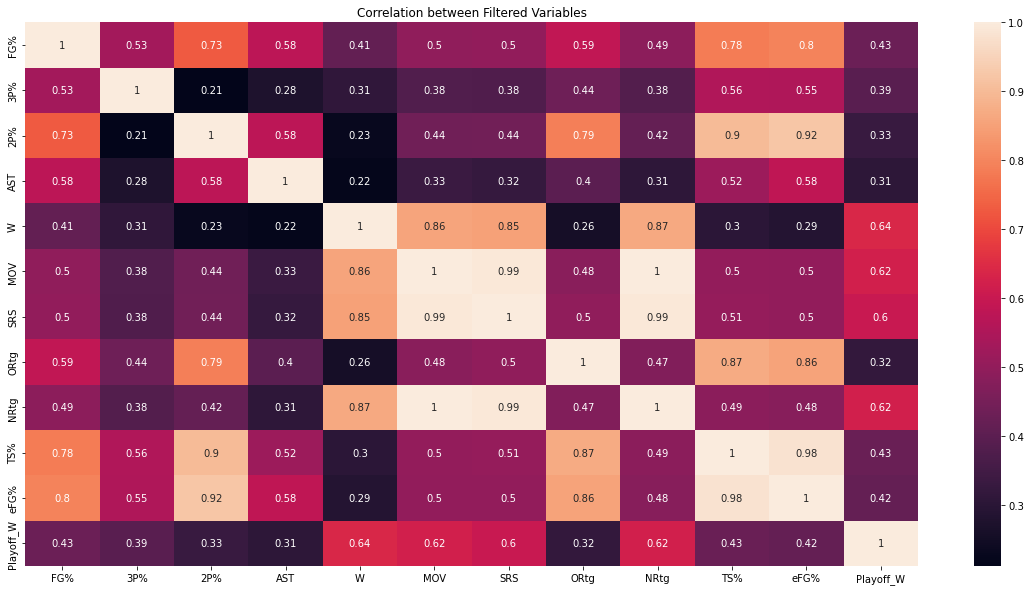

In [31]:
plt.figure(figsize=(20,10))
plt.title("Correlation between Filtered Variables")
sns.heatmap(data=data[variables].corr(), annot=True)

In [39]:
corr_pay = data['Playoff_W'].corr(data['Adjusted Payroll'])
corr_wins = data['W'].corr(data['Adjusted Payroll'])

print(f'Correlation between playoff wins and payrolls: {corr_pay}')
print(f'Correlation between regular season wins and payrolls: {corr_wins}')

Correlation between playoff wins and payrolls: 0.1461555639079819
Correlation between regular season wins and payrolls: 0.049439058894388675


In [5]:
remove = ['MOV','Adjusted Payroll']
variables = [item for item in variables if item not in remove]
variables

['FG%',
 '3P%',
 '2P%',
 'AST',
 'W',
 'SRS',
 'ORtg',
 'NRtg',
 'TS%',
 'eFG%',
 'Playoff_W']

In [6]:
X = data[variables].drop('Playoff_W',1)
Y = data['Playoff_W']

pred_X = pred_data[variables].drop('Playoff_W',1)

X.head()

C:\Users\whisk\AppData\Local\Temp\ipykernel_9196\929663138.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data[variables].drop('Playoff_W',1)
C:\Users\whisk\AppData\Local\Temp\ipykernel_9196\929663138.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pred_X = pred_data[variables].drop('Playoff_W',1)


,FG%,3P%,2P%,AST,W,SRS,ORtg,NRtg,TS%,eFG%
0,0.457,0.358,0.540,25.7,46.0,2.53,114.3,2.6,0.573,0.539
1,0.461,0.353,0.519,26.0,56.0,5.37,114.6,5.6,0.553,0.522
2,0.468,0.366,0.544,23.9,51.0,3.22,115.1,3.3,0.580,0.546
3,0.485,0.364,0.551,27.4,64.0,6.94,114.8,7.5,0.581,0.549
4,0.470,0.374,0.531,24.6,43.0,1.55,116.5,1.6,0.581,0.543


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
model = LinearRegression().fit(X_train, Y_train)
model_predicted_wins = model.predict(X_test)

In [8]:
# explore model performance
print('Coefficients: ', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared erorr: %.2f' 
    % mean_squared_error(Y_test, model_predicted_wins))
print('Coefficient of determination (R^2): %.2f' 
    % r2_score(Y_test, model_predicted_wins))

Coefficients:  [-57.54105     29.03258954  17.72032387   0.18965033   0.30597982
  -1.82706667  -0.14717768   1.85675137  46.10389168  31.79242049]
Intercept: -34.00825186881314
Mean squared erorr: 8.79
Coefficient of determination (R^2): 0.61


c:\Users\whisk\miniconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Playoff_W'>

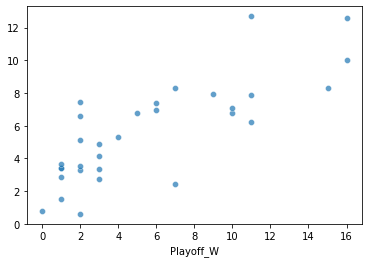

In [9]:
# scatter plot
sns.scatterplot(Y_test, model_predicted_wins)

In [10]:
model_predicted_wins = model.predict(pred_X)

w_min, w_max = min(model_predicted_wins), max(model_predicted_wins)
for i, win in enumerate(model_predicted_wins):
    model_predicted_wins[i] = (win-w_min) / (w_max - w_min)

model_predicted_wins

array([1.        , 0.71884052, 0.72501843, 0.61456392, 0.920708  ,
       0.78239557, 0.43611371, 0.33562168, 0.46060567, 0.6316428 ,
       0.66688446, 0.52352365, 0.38407305, 0.39182908, 0.81088339,
       0.38950309, 0.61960876, 0.62288467, 0.63585883, 0.37437782,
       0.76192152, 0.        , 0.29554468, 0.69900118, 0.10281249,
       0.15037367, 0.09074314, 0.30679224, 0.73913255, 0.547528  ])

In [27]:
model_predicted_wins_df = pred_data[['Team','Playoff_W']]
 
for i in range (30):
    model_predicted_wins_df.loc[i, 'Playoff_W'] = model_predicted_wins[i]

model_predicted_wins_df = model_predicted_wins_df.sort_values(by='Playoff_W',ascending=False).reset_index(drop=True)
model_predicted_wins_df = model_predicted_wins_df.rename(columns={'Playoff_W': 'Predicted Playoff Rating'})
model_predicted_wins_df

C:\Users\whisk\AppData\Local\Temp\ipykernel_9196\458387604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_predicted_wins_df.loc[i, 'Playoff_W'] = model_predicted_wins[i]


,Team,Predicted Playoff Rating
0,Boston Celtics,1.000000
1,Denver Nuggets,0.920708
2,Brooklyn Nets,0.810883
3,Golden State Warriors,0.782396
4,Philadelphia 76ers,0.761922
5,Los Angeles Clippers,0.739133
6,New Orleans Pelicans,0.725018
7,Sacramento Kings,0.718841
8,Cleveland Cavaliers,0.699001
9,Indiana Pacers,0.666884


<AxesSubplot:ylabel='Team'>

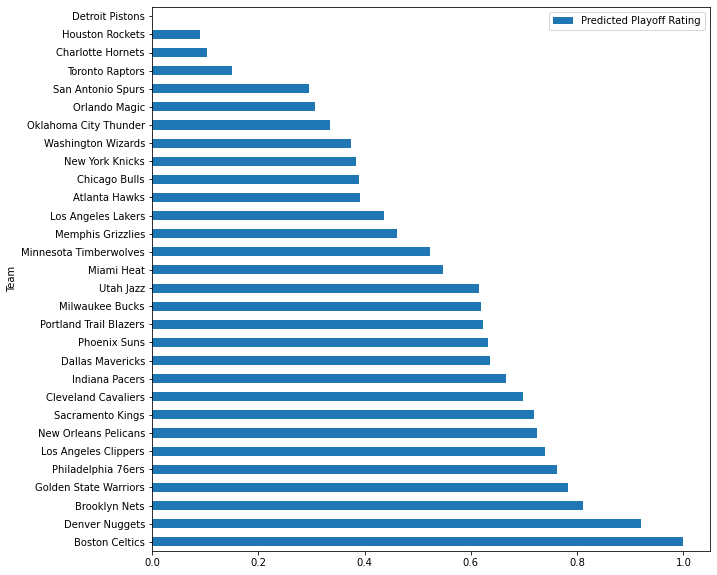

In [46]:
model_predicted_wins_df.plot.barh(x='Team', y='Predicted Playoff Rating', figsize=(10,10))